## 0. Importing Modules

In [1]:
##### some basic modules
import os
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

##### Image-related modules
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
import cv2 

##### keras module
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam


C:\Users\dabsdamoon\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
##### Import custom function

from alpha_model import model
from data_preprocessing import rgb_lab_transformation, feature_label_generation, data_generation
from visualization import visualize_validation_image

## 1. Uploading and Preprocessing Dataset

##### Uploading

In [3]:
size_row = 128
size_col = 128

dir_name = 'C:/Users/dabsdamoon/Desktop/Neowiz Project/education/anime_face/data/' # name of directory where image data is located

In [4]:
train_image, test_image, train_label, test_label = data_generation(dir_name = dir_name,
                                                                   image_size = (size_row, size_col),
                                                                   single_character = 'melon-chan') 
                                                                   # for training only one character, need to specify the character name

1/1


Here, even though I initially divide train and test image, I later decided to combine those as one train set for the model. Personally, I thought it's a bit meaningless to divide train and test set in this case, and later used 3 separated images to show the colorization result. However, I left train/test division code for possible future usage :)

In [5]:
train_feature = train_image.reshape(train_image.shape[0], size_row, size_col, 1) 
test_feature = test_image.reshape(test_image.shape[0], size_row, size_col, 1)

x_feature = np.concatenate([train_feature, test_feature])
x_label = np.concatenate([train_label, test_label])

## 2. Defining and Fitting the Model

##### Define the model

In [6]:
input_shape = (size_row,size_col,1)
kernel_size = 4

In [7]:
K.clear_session()

In [8]:
model = model(input_shape = input_shape, kernel_size = kernel_size, optimizer = Adam(0.0002, 0.5))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 4)         40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 8)         296       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
__________

##### Fitting

In [9]:
image_valid = plt.imread('C:/Users/dabsdamoon/Desktop/Neowiz Project/education/anime_face/melon_valid.png')
image_valid = cv2.resize(image_valid, (size_row, size_col))

img_gray = rgb2gray(image_valid).reshape(128, 128, 1)
img_gray3 = np.concatenate([img_gray]*3, axis = 2) # concatenating three gray images so that it can have 3 channels
img_lab3 = rgb2lab(img_gray3) # convert concatenated image to lab

In [10]:
model_loss = []
img_colorized = []

In [11]:
epochs = 100
save_interval = int(epochs/20) # later, going to visualize training process with 20 images  

In [12]:
for i in range(epochs):

    model_hist = model.fit(x=x_feature, 
                           y=x_label, 
                           batch_size= 1, 
                           epochs=1,
                           verbose = 0)
    
    model_loss.append(model_hist.history['loss'])
    
    if i % save_interval == 0:
        
        print(i, model_hist.history['loss'])
        
        valid_input = img_lab3[:,:,0].reshape(1, size_row, size_col, 1)/128
        
        pred = model.predict(valid_input)    
        pred = pred.reshape(size_row, size_col, 2)
        
        cur_pred = np.zeros((size_row, size_col, 3))             
        # Output colorizations
        cur_pred[:,:,0] = valid_input.reshape(size_row, size_col) * 128 # lab class
        cur_pred[:,:,1:] = pred*128 # lab predicted
        
        img_colorized.append(lab2rgb(cur_pred))        

0 [0.027326648871207403]
5 [0.023705490187017453]
10 [0.021789028107499085]
15 [0.019824106603239973]
20 [0.01793875847167025]


C:\Users\dabsdamoon\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 1 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


25 [0.015937695163302124]
30 [0.013927951775905159]


C:\Users\dabsdamoon\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 13 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


35 [0.012268995460019343]


C:\Users\dabsdamoon\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 7 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


40 [0.010650610320994423]


C:\Users\dabsdamoon\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 28 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


45 [0.009518810563410323]
50 [0.008566413812028864]
55 [0.00784517308153833]
60 [0.007307133558464961]
65 [0.006877128795410196]


C:\Users\dabsdamoon\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 19 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


70 [0.00660152079589251]
75 [0.006205191251097454]
80 [0.006030582967731688]
85 [0.00580951145513811]
90 [0.005567884780207856]
95 [0.005459257693857782]


The error messages above are caused by zero-values in image matrix, which I assume to be negligible.

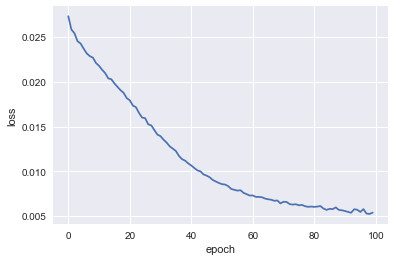

In [13]:
##### Plot loss function

plt.plot(model_loss)
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

##### Visualization

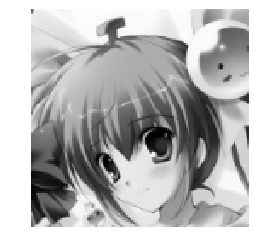

In [14]:
input_val = img_gray.copy()
plt.imshow(input_val.reshape(size_row, size_col), cmap = 'gray')
plt.axis('off')
plt.show()

In [15]:
grid_row = 4
grid_col = 5

In [16]:
g_row = []
i = 0

for r in range(grid_row):
    
    g_column = []
    
    for c in range(grid_col):
        g_column.append(img_colorized[i])
        i += 1
        
    g_column = np.concatenate(g_column, axis = 1)
    g_row.append(g_column)

g_row = np.concatenate(g_row)

This is a concatenated image of 25 colorization result showing the improvement as we repeat epochs of certain interval. (The sequence is from left to right, and from up to down)

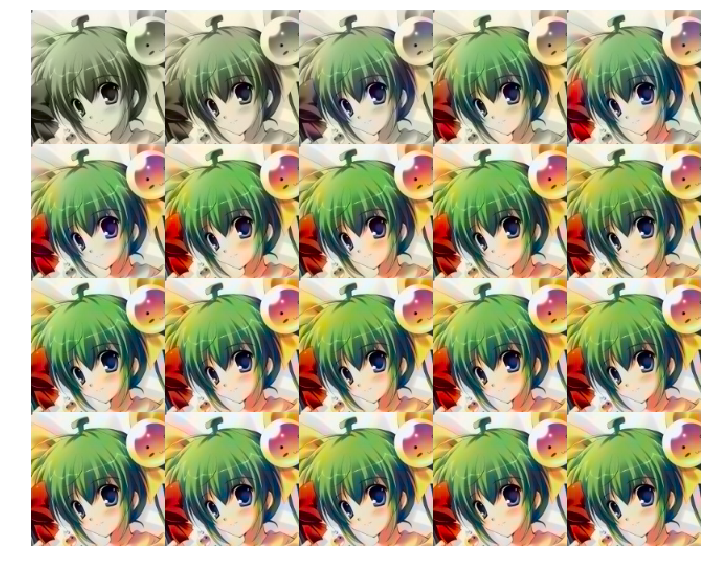

In [17]:
plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(g_row)

##### Test with different image (same character)

To show the functionality of trained colorization algorithm, I implemented two different tests. The first one is to color an image of same character (melon-chan) bit different from images in training dataset. Left is the original, middle is the input, and right is the result of colorization.

C:\Users\dabsdamoon\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 17 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


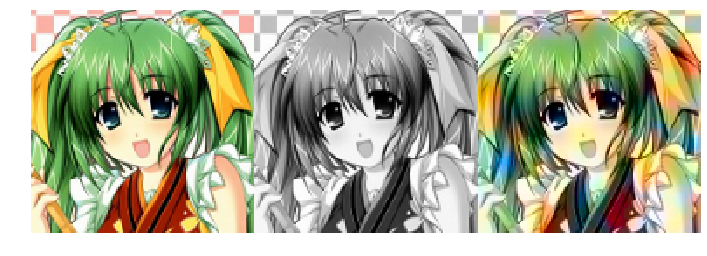

In [18]:
image_valid = plt.imread('C:/Users/dabsdamoon/Desktop/Neowiz Project/education/anime_face/melon_valid2.png')
visualize_validation_image(image_valid, model, image_size = (size_row, size_col))

##### Test with Different Character

The second test is to color an image of different character (melon-chan) quite different from the trained character. For this test, I use an image of 'Horo' character, which is quite different from 'Melon-chan' character. Like above, left is the original, middle is the input, and right is the result of colorization.

C:\Users\dabsdamoon\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 1 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


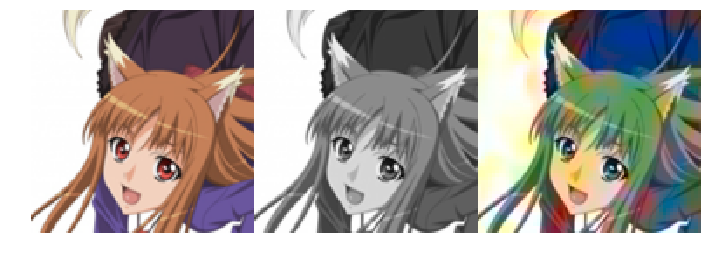

In [19]:
image_valid = plt.imread('C:/Users/dabsdamoon/Desktop/Neowiz Project/education/anime_face/horo_valid.png')
visualize_validation_image(image_valid, model, image_size = (size_row, size_col))